## Unsupervised Learning
## Project: Clustering baseball hitters based on offensive stats

## Getting Started

In this project, you will analyze a dataset containing baseball player offensive data on 2016 season. One goal of this project is to best describe the variation in the different types of baseball players. Doing so would give the general managers insights about what kind of abilities the player have, which will help the general managers make better decisions in free agents markets.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Fangraph dataset
try:
    data = pd.read_csv("FanGraphs Leaderboard_2016.csv")
    #data.drop(['Name', 'Team','playerid'], axis = 1, inplace = True)
except:
    print("Dataset could not be loaded. Is the dataset missing?")

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

In [2]:
# Display a description of the dataset
display(data.describe())

,G,PA,HR,R,RBI,SB,ISO,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,148.178082,615.986301,22.102740,79.397260,77.143836,8.849315,0.183630,0.307678,0.273000,0.340438,0.456589,0.340336,111.828767,0.086301,9.652055,-0.925342,2.957534,7741.835616
std,10.320843,60.920184,10.107511,17.708552,21.439567,9.956001,0.050914,0.030308,0.027069,0.032265,0.058981,0.031359,20.761822,3.798196,16.379643,9.753244,1.943791,4012.268893
min,116.000000,503.000000,3.000000,38.000000,29.000000,0.000000,0.075000,0.236000,0.209000,0.274000,0.311000,0.256000,59.000000,-10.100000,-26.500000,-20.500000,-1.600000,393.000000
25%,142.000000,566.250000,14.000000,67.000000,59.250000,2.000000,0.147000,0.288500,0.253250,0.316000,0.417250,0.318250,97.000000,-2.600000,-1.500000,-8.350000,1.400000,4721.750000
50%,151.000000,622.500000,22.000000,78.000000,79.500000,6.000000,0.180500,0.304500,0.271000,0.338500,0.452000,0.340000,111.000000,0.100000,7.950000,-0.700000,2.550000,7864.500000
75%,156.000000,670.750000,29.000000,90.500000,93.750000,13.000000,0.224000,0.326750,0.292000,0.361000,0.499000,0.359500,123.750000,2.400000,19.975000,5.875000,4.400000,10903.000000
max,162.000000,744.000000,47.000000,123.000000,133.000000,62.000000,0.305000,0.388000,0.348000,0.441000,0.620000,0.419000,170.000000,10.600000,67.000000,24.800000,9.600000,17171.000000


In [3]:
data.dtypes

Name         object
Team         object
G             int64
PA            int64
HR            int64
R             int64
RBI           int64
SB            int64
BB%          object
K%           object
ISO         float64
BABIP       float64
AVG         float64
OBP         float64
SLG         float64
wOBA        float64
wRC+          int64
BsR         float64
Off         float64
Def         float64
WAR         float64
playerid      int64
dtype: object

In [4]:
# convert object to floating
data['BB%'] = data['BB%'].str.rstrip('%').astype('float') / 100.0
data['K%'] = data['K%'].str.rstrip('%').astype('float') / 100.0

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# Select three indices of your choice you wish to sample from the dataset
indices = [1,51,101]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of baseball players dataset:")
display(samples)

Chosen samples of baseball players dataset:


,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Mookie Betts,Red Sox,158,730,31,122,113,26,0.067,0.110,...,0.318,0.363,0.534,0.379,136,10.6,41.9,14.0,8.2,13611
1,Wil Myers,Padres,157,676,28,99,94,28,0.101,0.237,...,0.259,0.336,0.461,0.341,114,7.6,19.4,-6.6,3.5,10047
2,Jacoby Ellsbury,Yankees,148,626,9,71,56,20,0.086,0.134,...,0.263,0.330,0.374,0.308,90,2.5,-5.0,0.8,1.7,4727


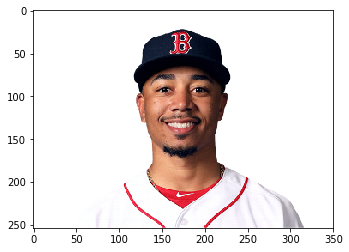

In [6]:
import matplotlib.pyplot as plt
img = plt.imread('img/Betts.png')
plt.imshow(img)

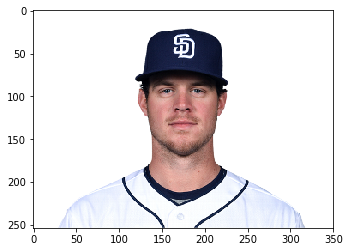

In [7]:
import matplotlib.pyplot as plt
img = plt.imread('img/Myers.png')
plt.imshow(img)

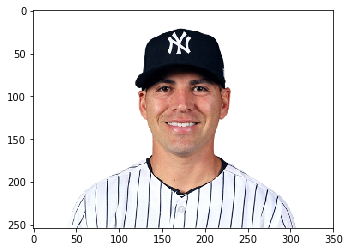

In [8]:
import matplotlib.pyplot as plt
img = plt.imread('img/Ellsbury.png')
plt.imshow(img)

### Implementation: Feature Relevance
considet the relevence of the offensive data

In the code block below, we implement the following:
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [9]:
#data_selected= data[['SLG','BB%','AVG','K%','SB']]
#samples_selected = samples[['SLG','BB%','AVG','K%','SB',]]
data_selected= data[['SLG','BB%','AVG','K%']]
samples_selected = samples[['SLG','BB%','AVG','K%']]

In [10]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
#range_target_features = ['SLG','BB%','AVG', 'K%', 'SB']
range_target_features = ['SLG','BB%','AVG', 'K%']

for target_feature in range_target_features:
    y_target = data_selected[target_feature]
    new_data = data_selected.drop([target_feature], axis = 1, inplace = False)

    #  Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, y_target, test_size=0.25, random_state=0)

    # Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print ("score is {} for feature {}".format(score, target_feature))

score is -0.303593491499363 for feature SLG
score is -1.0617249961806796 for feature BB%
score is 0.06876523734404094 for feature AVG
score is -0.17885442552495645 for feature K%


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the features present in the data. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


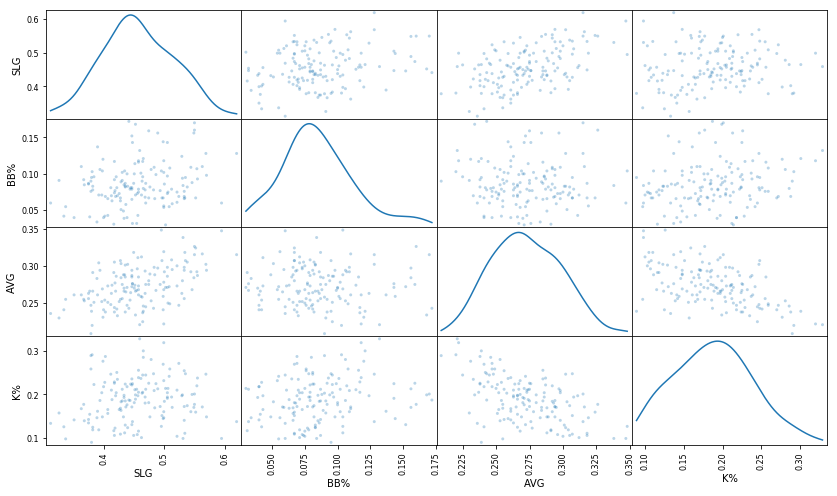

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data_selected, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

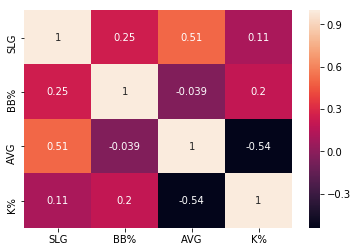

In [12]:
# heat map shows the correlation of the features
import seaborn as sns
sns.heatmap(data_selected.corr(), annot=True)

In [13]:
data_selected

,SLG,BB%,AVG,K%
0,0.550,0.170,0.315,0.201
1,0.534,0.067,0.318,0.110
2,0.554,0.107,0.292,0.220
3,0.549,0.156,0.284,0.170
4,0.512,0.079,0.308,0.194
5,0.531,0.084,0.338,0.098
6,0.533,0.069,0.294,0.172
7,0.533,0.066,0.298,0.140
8,0.546,0.088,0.268,0.200
9,0.569,0.128,0.302,0.247


In [14]:
samples_selected = pd.DataFrame(data_selected.loc[indices], columns = data_selected.keys()).reset_index(drop = True)
print("Chosen samples of baseball players dataset:")
display(samples_selected)

Chosen samples of baseball players dataset:


,SLG,BB%,AVG,K%
0,0.534,0.067,0.318,0.110
1,0.461,0.101,0.259,0.237
2,0.374,0.086,0.263,0.134


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

In [15]:
# For each feature find the data points with extreme high or low values
feature_outliers = {}
def compare_count(index):
    return feature_outliers[index]['count']

for feature in data_selected.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data_selected[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data_selected[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data_selected[~((data_selected[feature] >= Q1 - step) & (data_selected[feature] <= Q3 + step))])
    
    for outlier in data_selected[~((data_selected[feature] >= Q1 - step) & (data_selected[feature] <= Q3 + step))].index:
        feature_outlier = feature_outliers.get(str(outlier), {'count':0, 'features':[]});
        feature_outlier['features'].append(feature)
        feature_outliers[str(outlier)] = feature_outlier

outliers = list(feature_outliers.keys())
outliers = np.array(outliers, np.int32)

# Remove the outliers, if any were specified
good_data = data_selected.drop(data_selected.index[outliers]).reset_index(drop = True)
print(good_data.shape)

Data points considered outliers for the feature 'SLG':


,SLG,BB%,AVG,K%


Data points considered outliers for the feature 'BB%':


,SLG,BB%,AVG,K%
0,0.550,0.170,0.315,0.201
3,0.549,0.156,0.284,0.170
17,0.550,0.160,0.326,0.177
24,0.489,0.156,0.297,0.213
41,0.474,0.159,0.275,0.226
63,0.441,0.172,0.243,0.187
107,0.452,0.168,0.234,0.199


Data points considered outliers for the feature 'AVG':


,SLG,BB%,AVG,K%


Data points considered outliers for the feature 'K%':


,SLG,BB%,AVG,K%


(139, 4)


 There are several data points are considered outliers for more than one feature
These data points should be removed from the dataset as they fall well below the IQR. They are not helpful for training the data, will only skew the results.

## Feature Transformation
We use principal component analysis (PCA) to draw conclusions about the underlying structure of the baseball data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

PCA dimensions 1&2 cumulative sums:  0.8652
PCA dimensions 1,2,3&4 cumulative sums:  1.0


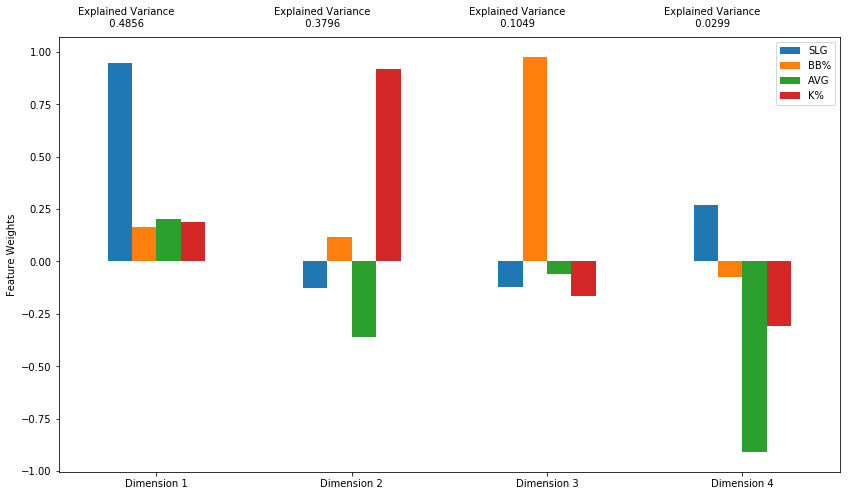

In [16]:
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 4).fit(data_selected)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples_selected)

# Generate PCA results plot
pca_results = vs.pca_results(data_selected, pca)

print ("PCA dimensions 1&2 cumulative sums: ", pca_results['Explained Variance'].cumsum()[1])
print ("PCA dimensions 1,2,3&4 cumulative sums: ", pca_results['Explained Variance'].cumsum()[3])

First 2 principal components: 86.52 percent variance in the data is explained; First 4 principal components: 100 percent variance in the data is explained; 
Dimension 1: Large variance for SLG, power hitter; Dimension 2 reduces the three features of dimension 1, relying on variance of feature K%, low contact hitter who got striked out a lot; Dimension 3 shows patient hitter with high BB%

In [17]:
# Display sample data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4
0,0.0643,-0.1002,-0.0180,0.0055
1,0.0130,0.0508,0.0066,-0.0022
2,-0.0906,-0.0358,0.0196,0.0038


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(data_selected)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(data_selected)

# Transform sample datas using the PCA fit above
pca_samples = pca.transform(samples_selected)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(reduced_data, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.1131,-0.0056
1,0.0643,-0.1002
2,0.1055,0.0122
3,0.0977,-0.0244
4,0.0594,-0.0154
5,0.0660,-0.1160
6,0.0706,-0.0344
7,0.0649,-0.0655
8,0.0861,0.0012
9,0.1302,0.0339


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

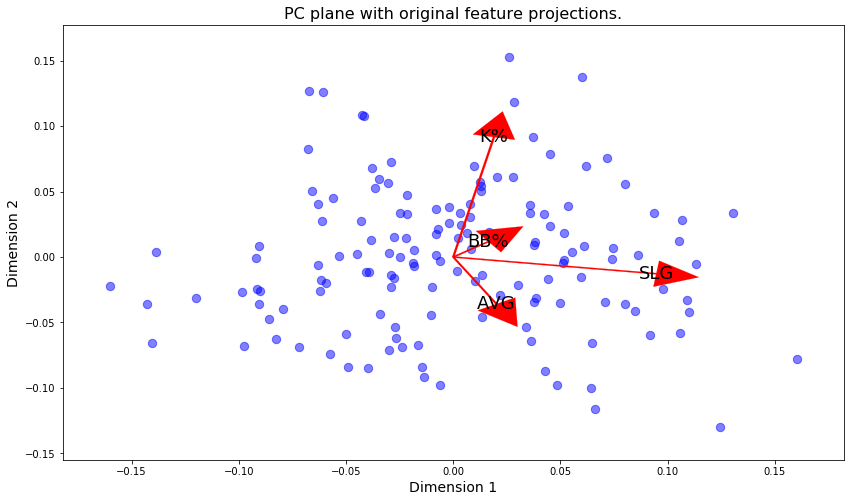

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,8))
ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
feature_vectors = pca.components_.T

# we use scaling factors to make the arrows easier to see
arrow_size, text_pos = 0.1, 0.1,

for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.02, head_length=0.02, linewidth=0.2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

ax.set_xlabel("Dimension 1", fontsize=14)
ax.set_ylabel("Dimension 2", fontsize=14)
ax.set_title("PC plane with original feature projections.", fontsize=16);


## Clustering

In this section, we choose to use K-Means clustering algorithm to identify the various baseball players segments hidden in the data. K-means clustering algorithm is quick and has fewer parameters to tune, it is suited when the data points are relatively easy to be separated from one cluster to another. KMeans can be considered as a "hard clustering" method. For this data set I chose the KMeans algorithm as it is straightforward and also efficient.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# TODO: Apply your clustering algorithm of choice to the reduced data 

def produceKmean(k):
    
    global clusterer, preds, centers, sample_preds
    clusterer = KMeans(n_clusters=k, random_state=0).fit(reduced_data)

# Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# Find the cluster centers
    centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,10):
    score = produceKmean(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results)

Number of Clusters,Silhouette Score
2,0.335921
3,0.374288
4,0.346381
5,0.346644
6,0.359226
7,0.381997
8,0.387766
9,0.344059


The silhouette is listed above, when n_components=3 we get good silhouette score 0.3742. also easier to inteprate.

### Cluster Visualization
We now visualize the results with cluster number K = 3

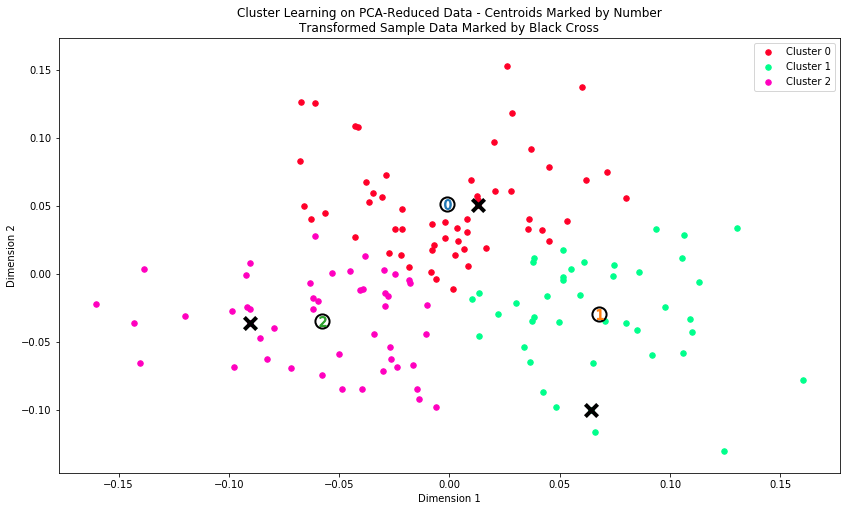

In [22]:
produceKmean(3)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)


In [23]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 2


## Conclusion
Cluster 0: slugger with high strikout rate: Wil Myers
Cluster 1: best player, has power also with low strikeout rate: Mookie Betts
Cluster 2: Limited power, low K rate, contact hitter: Jacoby Ellsbury
The general manager can should conduct A/B test on each cluster separately, get the feedback of A/B test on each cluster before make the final decision on free agent market

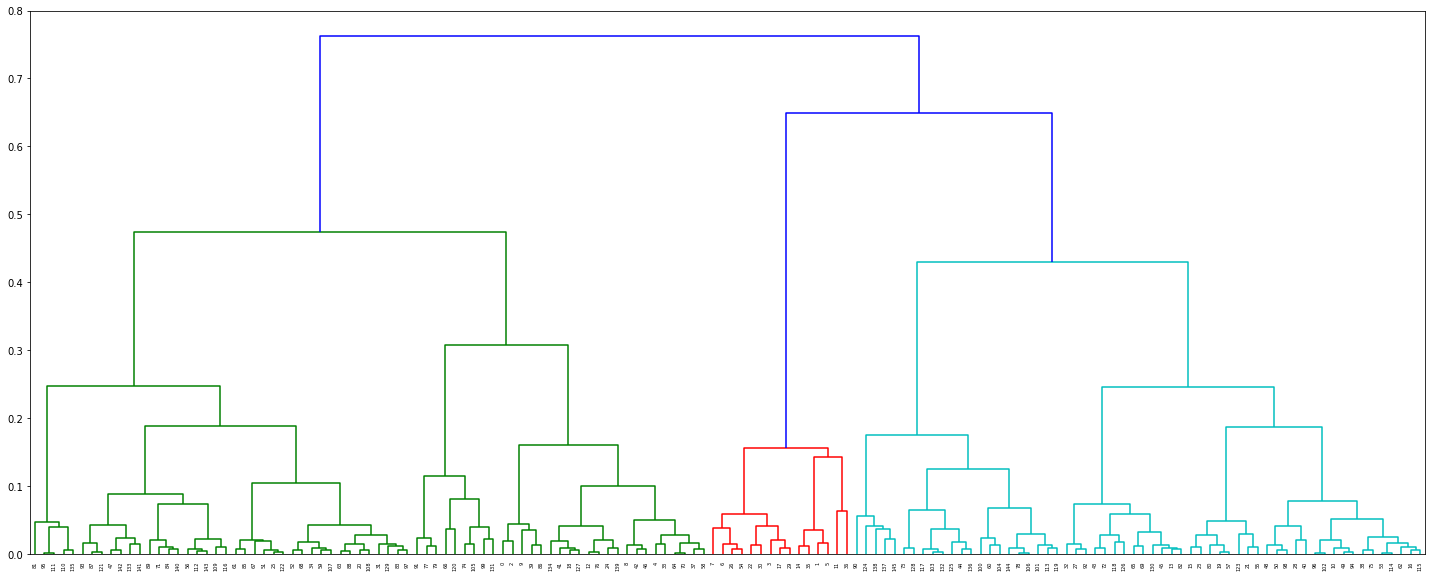

In [24]:
# hierarchy plot
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
Z = linkage(reduced_data, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)